# Importing Libraries


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Scaling & Train-Test Split

In [12]:
db= pd.read_csv('processed_data.csv')
X_all = db.drop('CLASS', axis=1)
y_all = db['CLASS']

# --- Train-Test Split ---
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)


# 5-Fold CV & GridSearchCV

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- GridSearchCV Parameters ---
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

grid_rf_all = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)


# Best Model Evaluation & Confusion Matrix for All Features

Fitting 5 folds for each of 72 candidates, totalling 360 fits


---- Random Forest (All Features) ----
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 200}
Test Accuracy: 0.995

Classification Report:
              precision    recall  f1-score   support

         Non       1.00      1.00      1.00        21
     Predict       1.00      0.90      0.95        10
    Diabetic       0.99      1.00      1.00       169

    accuracy                           0.99       200
   macro avg       1.00      0.97      0.98       200
weighted avg       1.00      0.99      0.99       200



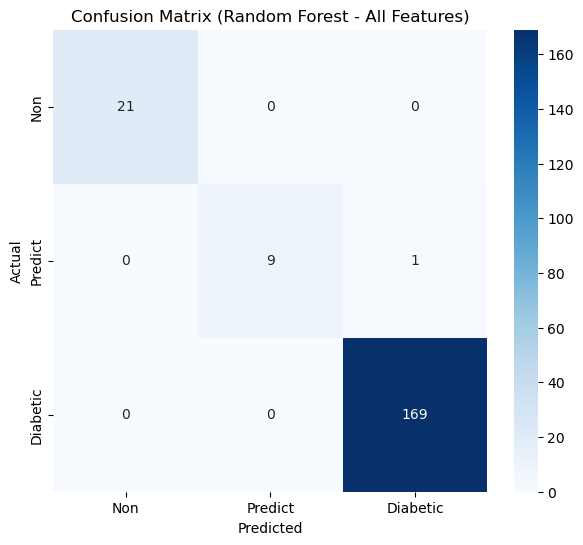

In [ ]:
grid_rf_all.fit(X_train_all, y_train_all)
best_rf_all = grid_rf_all.best_estimator_
y_pred_all = best_rf_all.predict(X_test_all)

print("---- Random Forest (All Features) ----")
print("Best Parameters:", grid_rf_all.best_params_)
print("Test Accuracy:", best_rf_all.score(X_test_all, y_test_all))
print("\nClassification Report:")
print(classification_report(y_test_all, y_pred_all, target_names=['Non', 'Predict', 'Diabetic']))

cm_all = confusion_matrix(y_test_all, y_pred_all)
plt.figure(figsize=(7,6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest - All Features)")
plt.show()

# Strong Feature Subset & Train-Test Split

In [ ]:

strong_features = ['AGE', 'BMI', 'HbA1c', 'CLASS']
data_strong = db[strong_features]
X_strong = data_strong.drop('CLASS', axis=1)
y_strong = data_strong['CLASS']

X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(
    X_strong, y_strong, test_size=0.2, random_state=42, stratify=y_strong
)

grid_rf_strong = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Best Model Evaluation & Confusion Matrix For Strong Features

Fitting 5 folds for each of 72 candidates, totalling 360 fits
---- Random Forest (Strong Features) ----
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}
Test Accuracy: 0.985

Classification Report:
              precision    recall  f1-score   support

         Non       1.00      0.90      0.95        21
     Predict       1.00      0.90      0.95        10
    Diabetic       0.98      1.00      0.99       169

    accuracy                           0.98       200
   macro avg       0.99      0.93      0.96       200
weighted avg       0.99      0.98      0.98       200



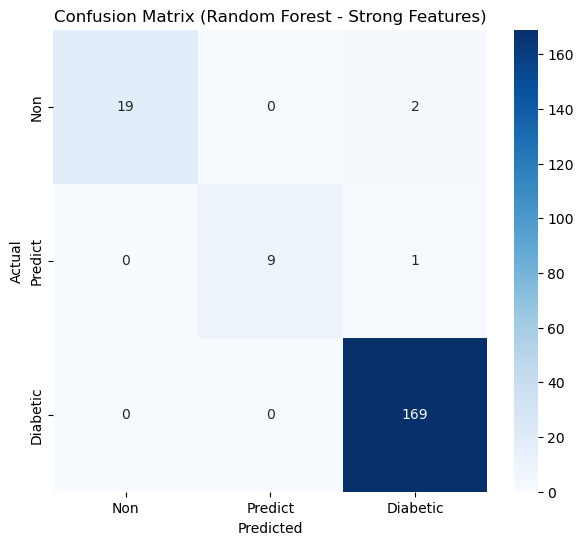

In [18]:
grid_rf_strong.fit(X_train_strong, y_train_strong)

best_rf_strong = grid_rf_strong.best_estimator_
y_pred_strong = best_rf_strong.predict(X_test_strong)

print("---- Random Forest (Strong Features) ----")
print("Best Parameters:", grid_rf_strong.best_params_)
print("Test Accuracy:", best_rf_strong.score(X_test_strong, y_test_strong))
print("\nClassification Report:")
print(classification_report(y_test_strong, y_pred_strong, target_names=['Non', 'Predict', 'Diabetic']))

cm_strong = confusion_matrix(y_test_strong, y_pred_strong)
plt.figure(figsize=(7,6))
sns.heatmap(cm_strong, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest - Strong Features)")
plt.show()

# Conclusion

"All Features vs Strong Features"

  -Using all features, the model considers every available variable, which can improve predictive accuracy but may include irrelevant or redundant features.

  -Using strong features (AGE, BMI, HbA1c) simplifies the model while maintaining almost the same predictive performance.

"Model Performance"

  -Random Forest was tuned using 5-Fold Cross-Validation with GridSearchCV, optimizing hyperparameters like n_estimators, max_depth, min_samples_leaf, and criterion.

  -Evaluation metrics (accuracy, precision, recall, F1-score) and confusion matrices show that Random Forest can reliably classify Non, Predict, and Diabetic classes.

"Insights"

  -Strong features alone often provide comparable performance to the full feature set.

  -Random Forest naturally handles non-linear relationships and interactions among features, making it robust for medical datasets.

  -Feature importance scores can help identify which variables contribute most to predicting diabetes.

"Practical Recommendation"

  -For clinical or real-world use, the strong features model is preferred for simplicity and interpretability.

  -The all-features model may be used when maximizing predictive accuracy is the priority, even if the model is more complex.